In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
from classifiers.kernel import Kernel

In [4]:
kernel = Kernel('Pauli', reps=3)

In [5]:
from qiskit import IBMQ
if IBMQ.active_account() is None:
    IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-kaist', group='internal', project='default')
backend = provider.get_backend('ibmq_qasm_simulator')
backend

<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>

In [6]:
from qiskit.circuit.library import PauliFeatureMap
PauliFeatureMap(2, reps=3).draw()

┌───┐┌─────────────┐                                          ┌───┐»
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ H ├»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘└───┘»
«     ┌─────────────┐                                          ┌───┐»
«q_0: ┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ H ├»
«     ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐├───┤»
«q_1: ┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
«     └─────────────┘└───┘└──────────────────────────────┘└───┘└───┘»
«     ┌─────────────┐                                          
«q_0: ┤ P(2.0*x[0]) ├──■────────────────────────────────────■──
«     ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐
«q_1: ┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └─────────────┘└───┘└──────────────────────────────┘└───┘

In [7]:
from classifiers.convex.svm import BinarySVM

In [8]:
svm = BinarySVM(kernel, C=None, k=10, mutation='REDUCED_QASVM')

In [9]:
from classifiers.datasets.dataloader import Sklearn_DataLoader
from classifiers.datasets.datascaler import DataScaler

In [10]:
dl = Sklearn_DataLoader('iris', labels=(0, 1))
X, y, Xt, yt = dl(8, true_hot=0)

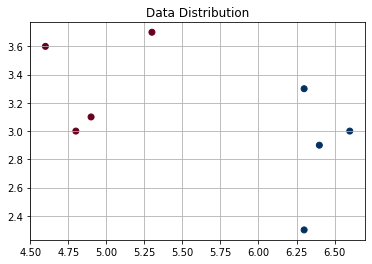

In [11]:
from classifiers.visualization import Plot_Data, Plot_SVM
Plot_Data(X, y).plot()

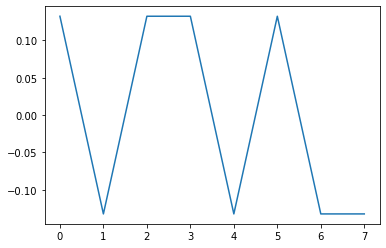

In [12]:
svm.fit(X, y)
plt.plot(svm.f(X))

In [13]:
svm.f(X)

array([ 0.13231062, -0.13231062,  0.13231062,  0.13231062, -0.13231063,
        0.13231063, -0.13231062, -0.13231062])

In [14]:
from classifiers.quantum.qasvm import QASVM
from qiskit.circuit.library import RealAmplitudes, PauliFeatureMap


In [15]:
feature_map = PauliFeatureMap(4)
var_form = RealAmplitudes(3, reps=3)

In [16]:
from qiskit.utils import QuantumInstance

In [17]:
from qiskit.providers.aer import AerSimulator
quantum_instance = QuantumInstance(backend, shots=2**13)

In [18]:
qasvm = QASVM(X, y, num_data_qubits=4, var_form=var_form, quantum_instance = quantum_instance, feature_map = feature_map, C=None, k=10, option='QASVM').dual

In [19]:
qasvm.first_order_circuit.draw(fold=-1)

┌───┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ┌───┐┌─┐
 a_0: ───┤ H ├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■─────────────────────────────────────────────────■────────────────────────────────────────■──■─┤ H ├┤M├
      ┌──┴───┴───┐                              ┌──────────┐                                                           ┌──────────┐                                                                            ┌──────────┐                                                                                                                                                                                                                                                                                                                        │                                                 │                                        │  │ └───┘└╥┘
 i_0: ┤ RY(θ[0]) ├───────■─────────■────────────┤ RY(θ[3]) ├────────────────────────■─────────────────■────────────────┤ RY(θ[6]) ├───────────────────────────■───────────────────────────────■────────────────┤ RY(θ[9]) ├────────────────────o──────────────────────■──────────────────■─────────o──────────────────────■───────────────────────o──────────────────────o───────────────────────■──────────────o──────────────────────o───────────────────────■─────────■─────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────┼────────────────────────────────────────┼──┼───────╫─
      ├──────────┤     ┌─┴─┐       │            └──────────┘          ┌──────────┐┌─┴─┐               │                └──────────┘┌──────────┐             ┌─┴─┐                             │                └──────────┘┌───────────┐       │                      │                  │         │                      │                       │                      │                       │              │                      │                       │         │                                                                         │                                                 │                                        │  │       ║ 
 i_1: ┤ RY(θ[1]) ├─────┤ X ├───────┼─────────────────■────────────────┤ RY(θ[4]) ├┤ X ├───────────────┼─────────────────────■──────┤ RY(θ[7]) ├─────────────┤ X ├─────────────────────────────┼─────────────────────■──────┤ RY(θ[10]) ├───────o──────────────────────o──────────────────o─────────■──────────────────────■───────────────────────o──────────────────────o───────────────────────o──────────────■──────────────────────■───────────────────────■─────────■─────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────┼────────────────────────────────────────┼──┼───────╫─
      ├──────────┤     └───┘     ┌─┴─┐             ┌─┴─┐              ├──────────┤└───┘             ┌─┴─┐                 ┌─┴─┐    ├──────────┤             └───┘                           ┌─┴─┐

In [20]:
print(qasvm.second_order_circuit.depth())

30


In [21]:
from classifiers.optimizer import SPSA
optimizer = SPSA(qasvm, blocking=False)


/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

In [22]:
from classifiers.callback import CostParamStorage
storage = CostParamStorage(interval=1)


In [23]:
from tqdm.notebook import tqdm

epochs = 2**7
last_avg = 2**4

for epoch in tqdm(range(epochs)):
    optimizer.step(storage)
    if np.all(storage.last_std(last_avg)<1e-2):
        break

qasvm.parameters = storage.last_avg(last_avg)

  0%|          | 0/128 [00:00<?, ?it/s]

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

In [24]:
from classifiers.visualization import compare_svm_and_qasvm

/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,
/home/quic/anaconda3/envs/QUIC/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_

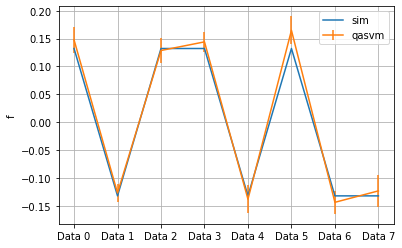

In [25]:
l = compare_svm_and_qasvm(svm, qasvm)

In [26]:
l

array([[ 0.15266113, -0.1354248 ,  0.1331543 ,  0.15888672, -0.14394531,
         0.18881836, -0.12861328, -0.12111816],
       [ 0.13671875, -0.12355957,  0.14355469,  0.14921875, -0.1557373 ,
         0.16181641, -0.15212402, -0.11499023],
       [ 0.14855957, -0.13356934,  0.12998047,  0.12275391, -0.15808105,
         0.15559082, -0.1501709 , -0.10834961],
       [ 0.14216309, -0.11396484,  0.10727539,  0.13779297, -0.1177002 ,
         0.15292969, -0.13347168, -0.10380859],
       [ 0.15471191, -0.12497559,  0.14213867,  0.14875488, -0.12995605,
         0.15339355, -0.13569336, -0.12512207],
       [ 0.14257812, -0.11862793,  0.13554688,  0.14570312, -0.13708496,
         0.15756836, -0.15039062, -0.1246582 ],
       [ 0.17773438, -0.12194824,  0.11708984,  0.14831543, -0.14030762,
         0.18696289, -0.13017578, -0.12458496],
       [ 0.14221191, -0.12194824,  0.11401367,  0.14326172, -0.1279541 ,
         0.15754395, -0.15046387, -0.16013184],
       [ 0.14003906, -0.14250488

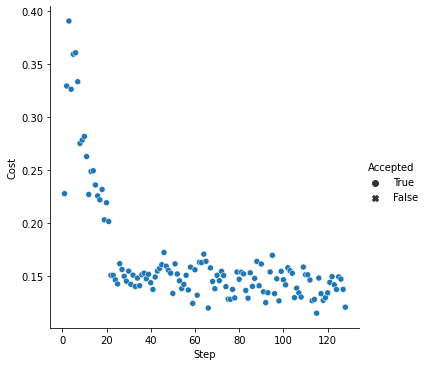

In [27]:
storage.plot()

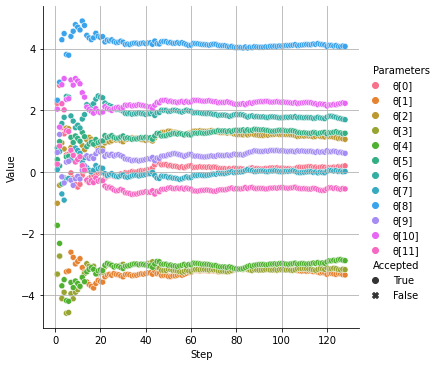

In [28]:
storage.plot_params()

In [30]:
storage.last_std(last_avg)

array([0.02190728, 0.03846908, 0.03654653, 0.02027086, 0.04753008,
       0.01824354, 0.03206023, 0.02610264, 0.03169817, 0.02134218,
       0.02807031, 0.0274567 ])

In [33]:
storage.data[40:60][storage.data.columns[1:-3]].std(axis=0).to_numpy()

array([0.062531  , 0.05007147, 0.0946137 , 0.10082107, 0.0460375 ,
       0.05402212, 0.04655659, 0.06166379, 0.03841726, 0.06548414,
       0.07440884, 0.05749251])

In [34]:
from qiskit import __qiskit_version__
__qiskit_version__

{'qiskit-terra': '0.17.1', 'qiskit-aer': '0.8.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.12.2', 'qiskit-aqua': '0.9.1', 'qiskit': '0.25.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [37]:
!conda install conda

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/quic/anaconda3/envs/QUIC

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py39h27cfd23_1003         324 KB
    chardet-4.0.0              |py39h06a4308_1003         194 KB
    conda-4.10.1               |   py39h06a4308_1         2.9 MB
    conda-package-handling-1.7.3|   py39h27cfd23_1         884 KB
    cryptography-3.4.7         |   py39hd23ed53_0         906 KB
    pycosat-0.6.3              |   py39h27cfd23_0          82 KB
    pysocks-1.7.1              |   py39h06a4308_0          31 KB
    ruamel_yaml-0.15.100       |   py39h27cfd23_0         260 KB
    -------

In [38]:
!y

/bin/bash: y: 명령어를 찾을 수 없음


In [39]:
from qiskit.providers.aer import AerSimulator

AerSimulator(method='statevector', device='GPU')

AerError: "Invalid simulation device GPU. Available devices are: ['CPU']"